# FTS Grammar (Galician)
Sara Han

In this practice, I will write a small FST grammar, and I will work with one of my mother tongues, the Galician language (Galego).

For more information:

https://es.scribd.com/document/149353352/Manual-practico-de-galego-2006-Ramon-X-Beltran-Carballeira# (Practical Galician Grammar)

https://www.orbilat.com/Languages/Galician/Grammar/index.html (Descriptive Grammar of the Galician Language)

https://academia.gal/dicionario (Galician Dictionary and conjugator)

https://wikidog.xunta.gal/index.php/El_n%C3%BAmero (Wikipedia: singular and plural for nouns)

https://es.wikibooks.org/wiki/Gallego/Gram%C3%A1tica/Verbo#Paradigmas_regulares (Wikipedia: verb conjugation)

Note: I will explain the different parts of our grammar in different sections, but for a easier visualization the whole code used it is in the last chunk.


In [18]:
# I install pyfoma
# !pip install pyfoma

# Note: as the transducer is quite big, the view does not work properly in Google Colab as it is shown with high zoom

In [19]:
# I import pyfoma
from pyfoma import *

# Grammar's dictionary structure

For the nouns, I will pluralize them.

In the case of the verbs, as there are three conjugations, and each is inflected in a different way for each person of the singular and the plural, I added three different non-terminals. In addition, I conjugated the present indicative tense (*presente*), the past simple indicative tense (*pretérito* or *pretérito perfecto* as in Galician there are not compund tenses) and the future indicative tense (*futuro*).

The tags used are the following:
- [N] --> Noun
- [Sg] --> Singular
- [Pl] --> Plural
- [V1] --> Verb of the first conjugation
- [V2] --> Verb of the second conjugation
- [V3] --> Verb of the third conjugation
- [1p] --> First person
- [2p] --> Second person
- [3p] --> Third person
- [Present] --> Present indicative tense
- [Past] --> Past simple indicative tense
- [Future] --> Future indicative tense

In [20]:
# List with noun stems

nouns = ["bolboreta", "irmá", "peixe", "prato", "iglú", "avoa", "lei", "praia", "can", "xamón", "noz", "foz", "pintor",
         "compás", "lapis", "luns", "fax", "tórax", "mel", "sol", "papel", "animal", "candil"]
# meanings = [butterfly, sister, fish, plate, igloo, grandmother, law, beach, dog, ham, walnut, sickle, painter,
#            compass, pencil, Monday, fax, thorax, honey, sun, paper, animal, oil lamp]


########## List with verb stems

verbs1 = ["falar", "amontoar", "cambiar"] # verbs from the first conjugation -ar
verbs2 = ["comer", "obedecer", "atraer"] # verbs from the second conjugation -er
verbs3 = ["partir", "traducir", "delinquir"] # verbs from the third conjugation -ir
# meanings = [talk, stack, change],
#            [eat, obey, attract],
#            [leave, translate, commit crime]

irregular_verbs = ["estar", "facer", "dicir"] # irregular verbs
# meanings = [be, do/make, say]


########## Starting the grammar

grammar = {}
grammar["S"] = [("", "Noun"), ("", "Verb")]


########## Nouns

grammar["Noun"] = [(noun, "NInfl") for noun in nouns] # I tag the nouns
#
grammar["NInfl"] = [(("'[N]''[Sg]'", ""), "#"), (("'[N]''[Pl]'", "+s"), "#")] # we normally pluralize adding -s


########## Verbs

grammar["Verb"] = [(verb, "V1") for verb in verbs1] # I tag the verbs
grammar["Verb"] += [(verb, "V2") for verb in verbs2]
grammar["Verb"] += [(verb, "V3") for verb in verbs3]


# I add the irregular verbs, I chose ("estar", "facer", "dicir")

# present indicative tense of "estar"
grammar["Verb"]+= [(("'estar' '[V1]' '[1p]' '[Sg]' '[Present]' '[Ind]'", "estou"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Sg]' '[Present]' '[Ind]'", "estás"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Sg]' '[Present]' '[Ind]'", "está"), "#"), \
                   (("'estar' '[V1]' '[1p]' '[Pl]' '[Present]' '[Ind]'", "estamos"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Pl]' '[Present]' '[Ind]'", "estades"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Pl]' '[Present]' '[Ind]'", "están"), "#")]

# past simple indicative tense of "estar"
grammar["Verb"]+= [(("'estar' '[V1]' '[1p]' '[Sg]' '[Past]' '[Ind]'", "estiven"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Pl]' '[Past]' '[Ind]'", "estiveches"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Sg]' '[Past]' '[Ind]'", "estivo"), "#"), \
                   (("'estar' '[V1]' '[1p]' '[Pl]' '[Past]' '[Ind]'", "estivemos"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Sg]' '[Past]' '[Ind]'", "estivestes"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Pl]' '[Past]' '[Ind]'", "estiveron"), "#")]

# future indicative tense of "estar"
grammar["Verb"]+= [(("'estar' '[V1]' '[1p]' '[Sg]' '[Future]' '[Ind]'", "estarei"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Sg]' '[Future]' '[Ind]'", "estarás"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Sg]' '[Future]' '[Ind]'", "estará"), "#"), \
                   (("'estar' '[V1]' '[1p]' '[Pl]' '[Future]' '[Ind]'", "estaremos"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Pl]' '[Future]' '[Ind]'", "estaredes"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Pl]' '[Future]' '[Ind]'", "estarán"), "#")]

# present indicative tense of "facer"
grammar["Verb"]+= [(("'facer' '[V2]' '[1p]' '[Sg]' '[Present]' '[Ind]'", "fago"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Sg]' '[Present]' '[Ind]'", "fas"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Sg]' '[Present]' '[Ind]'", "fai"), "#"), \
                   (("'facer' '[V2]' '[1p]' '[Pl]' '[Present]' '[Ind]'", "facemos"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Pl]' '[Present]' '[Ind]'", "facedes"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Pl]' '[Present]' '[Ind]'", "fan"), "#")]

# past simple indicative tense of "facer"
grammar["Verb"]+= [(("'facer' '[V2]' '[1p]' '[Sg]' '[Past]' '[Ind]'", "fixen"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Sg]' '[Past]' '[Ind]'", "fixeches"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Sg]' '[Past]' '[Ind]'", "fixo"), "#"), \
                   (("'facer' '[V2]' '[1p]' '[Pl]' '[Past]' '[Ind]'", "fixemos"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Pl]' '[Past]' '[Ind]'", "fixestes"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Pl]' '[Past]' '[Ind]'", "fixeron"), "#")]

# future indicative tense of "facer"
grammar["Verb"]+= [(("'facer' '[V2]' '[1p]' '[Sg]' '[Future]' '[Ind]'", "farei"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Sg]' '[Future]' '[Ind]'", "farás"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Sg]' '[Future]' '[Ind]'", "fará"), "#"), \
                   (("'facer' '[V2]' '[1p]' '[Pl]' '[Future]' '[Ind]'", "faremos"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Pl]' '[Future]' '[Ind]'", "faredes"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Pl]' '[Future]' '[Ind]'", "farán"), "#")]

# present indicative tense of "dicir"
grammar["Verb"]+= [(("'dicir' '[V3]' '[1p]' '[Sg]' '[Present]' '[Ind]'", "digo"), "#"), \
                   (("'dicir' '[V3]' '[2p]' '[Sg]' '[Present]' '[Ind]'", "dis"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Sg]' '[Present]' '[Ind]'", "di"), "#"), \
                   (("'dicir' '[V3]' '[1p]' '[Pl]' '[Present]' '[Ind]'", "dicimos"), "#"), \
                   (("'dicir' '[V3]' '[2p]' '[Pl]' '[Present]' '[Ind]'", "dicides"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Pl]' '[Present]' '[Ind]'", "din"), "#")]

# past simple indicative tense of "dicir"
grammar["Verb"]+= [(("'dicir' '[V3]' '[1p]' '[Sg]' '[Past]' '[Ind]'", "dixen"), "#"),\
                   (("'dicir' '[V3]' '[2p]' '[Sg]' '[Past]' '[Ind]'", "dixeches"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Sg]' '[Past]' '[Ind]'", "dixo"), "#"), \
                   (("'dicir' '[V3]' '[1p]' '[Pl]' '[Past]' '[Ind]'", "dixemos"), "#"), \
                   (("'dicir' '[V3]' '[2p]' '[Pl]' '[Past]' '[Ind]'", "dixestes"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Pl]' '[Past]' '[Ind]'", "dixeron"), "#")]

# future indicative tense of "dicir"
grammar["Verb"]+= [(("'dicir' '[V3]' '[1p]' '[Sg]' '[Future]' '[Ind]'", "direi"), "#"), \
                   (("'dicir' '[V3]' '[2p]' '[Sg]' '[Future]' '[Ind]'", "dirás"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Sg]' '[Future]' '[Ind]'", "dirá"), "#"), \
                   (("'dicir' '[V3]' '[1p]' '[Pl]' '[Future]' '[Ind]'", "diremos"), "#"), \
                   (("'dicir' '[V3]' '[2p]' '[Pl]' '[Future]' '[Ind]'", "diredes"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Pl]' '[Future]' '[Ind]'", "dirán"), "#")]



# I add the other non-terminal of our grammar to distinguish the conjugations

grammar["V1"] = [(("'[V1]'", ""), "VInfl1")]
grammar["V2"]= [(("'[V2]'", ""), "VInfl2")]
grammar["V3"]= [(("'[V3]'", ""), "VInfl3")]


# first conjugation

# present indicative tense
grammar["VInfl1"] = [(("'[1p]' '[Sg]' '[Present]' '[Ind]'", "+o"), "#"), \
                     (("'[2p]' '[Sg]' '[Present]' '[Ind]'", "+as"), "#"), \
                     (("'[3p]' '[Sg]' '[Present]' '[Ind]'", "+a"), "#"), \
                     (("'[1p]' '[Pl]' '[Present]' '[Ind]'", "+amos"), "#"), \
                     (("'[2p]' '[Pl]' '[Present]' '[Ind]'", "+ades"), "#"), \
                     (("'[3p]' '[Pl]' '[Present]' '[Ind]'", "+an"), "#"),]

# past simple indicative tense
grammar["VInfl1"] += [(("'[1p]''[Sg]''[Past]''[Ind]'", "+ei"), "#"), \
                      (("'[2p]''[Sg]''[Past]''[Ind]'", "+aches"), "#"), \
                      (("'[3p]''[Sg]''[Past]''[Ind]'", "+ou"), "#"), \
                      (("'[1p]''[Pl]''[Past]''[Ind]'", "+amos"), "#"), \
                      (("'[2p]''[Pl]''[Past]''[Ind]'", "+astes"), "#"), \
                      (("'[3p]''[Pl]''[Past]''[Ind]'", "+aron"), "#"),]

# future indicative tense
grammar["VInfl1"] += [(("'[1p]''[Sg]''[Future]''[Ind]'", "+arei"), "#"), \
                      (("'[2p]''[Sg]''[Future]''[Ind]'", "+arás"), "#"), \
                      (("'[3p]''[Sg]''[Future]''[Ind]'", "+ará"), "#"), \
                      (("'[1p]''[Pl]''[Future]''[Ind]'", "+aremos"), "#"), \
                      (("'[2p]''[Pl]''[Future]''[Ind]'", "+aredes"), "#"), \
                      (("'[3p]''[Pl]''[Future]''[Ind]'", "+arán"), "#"),]


# second conjugation

# present indicative tense
grammar["VInfl2"] = [(("'[1p]' '[Sg]' '[Present]' '[Ind]'", "+o"), "#"), \
                     (("'[2p]' '[Sg]' '[Present]' '[Ind]'", "+es"), "#"), \
                     (("'[3p]' '[Sg]' '[Present]' '[Ind]'", "+e"), "#"), \
                     (("'[1p]' '[Pl]' '[Present]' '[Ind]'", "+emos"), "#"), \
                     (("'[2p]' '[Pl]' '[Present]' '[Ind]'", "+edes"), "#"), \
                     (("'[3p]' '[Pl]' '[Present]' '[Ind]'", "+en"), "#"),]

# past simple indicative tense
grammar["VInfl2"] += [(("'[1p]''[Sg]''[Past]''[Ind]'", "+ín"), "#"), \
                      (("'[2p]''[Sg]''[Past]''[Ind]'", "+iches"), "#"), \
                      (("'[3p]''[Sg]''[Past]''[Ind]'", "+en"), "#"), \
                      (("'[1p]''[Pl]''[Past]''[Ind]'", "+emos"), "#"), \
                      (("'[2p]''[Pl]''[Past]''[Ind]'", "+estes"), "#"), \
                      (("'[3p]''[Pl]''[Past]''[Ind]'", "+eron"), "#"),]

# future indicative tense
grammar["VInfl2"] += [(("'[1p]''[Sg]''[Future]''[Ind]'", "+erei"), "#"), \
                      (("'[2p]''[Sg]''[Future]''[Ind]'", "+erás"), "#"), \
                      (("'[3p]''[Sg]''[Future]''[Ind]'", "+erá"), "#"), \
                      (("'[1p]''[Pl]''[Future]''[Ind]'", "+eremos"), "#"), \
                      (("'[2p]''[Pl]''[Future]''[Ind]'", "+eredes"), "#"), \
                      (("'[3p]''[Pl]''[Future]''[Ind]'", "+erán"), "#"),]


# third conjugation

# present indicative tense
grammar["VInfl3"] = [(("'[1p]' '[Sg]' '[Present]' '[Ind]'", "+o"), "#"), \
                     (("'[2p]' '[Sg]' '[Present]' '[Ind]'", "+es"), "#"), \
                     (("'[3p]' '[Sg]' '[Present]' '[Ind]'", "+e"), "#"), \
                     (("'[1p]' '[Pl]' '[Present]' '[Ind]'", "+imos"), "#"), \
                     (("'[2p]' '[Pl]' '[Present]' '[Ind]'", "+ides"), "#"), \
                     (("'[3p]' '[Pl]' '[Present]' '[Ind]'", "+en"), "#"),]

# past simple indicative tense
grammar["VInfl3"] += [(("'[1p]''[Sg]''[Past]''[Ind]'", "+ín"), "#"), \
                      (("'[2p]''[Sg]''[Past]''[Ind]'", "+iches"), "#"), \
                      (("'[3p]''[Sg]''[Past]''[Ind]'", "+iu"), "#"), \
                      (("'[1p]''[Pl]''[Past]''[Ind]'", "+imos"), "#"), \
                      (("'[2p]''[Pl]''[Past]''[Ind]'", "+istes"), "#"), \
                      (("'[3p]''[Pl]''[Past]''[Ind]'", "+iron"), "#"),]

# future indicative tense
grammar["VInfl3"] += [(("'[1p]''[Sg]''[Future]''[Ind]'", "+irei"), "#"), \
                      (("'[2p]''[Sg]''[Future]''[Ind]'", "+irás"), "#"), \
                      (("'[3p]''[Sg]''[Future]''[Ind]'", "+irá"), "#"), \
                      (("'[1p]''[Pl]''[Future]''[Ind]'", "+iremos"), "#"), \
                      (("'[2p]''[Pl]''[Future]''[Ind]'", "+iredes"), "#"), \
                      (("'[3p]''[Pl]''[Future]''[Ind]'", "+irán"), "#"),]



In [21]:
# View of the grammar for nouns
grammar["Noun"]

[('bolboreta', 'NInfl'),
 ('irmá', 'NInfl'),
 ('peixe', 'NInfl'),
 ('prato', 'NInfl'),
 ('iglú', 'NInfl'),
 ('avoa', 'NInfl'),
 ('lei', 'NInfl'),
 ('praia', 'NInfl'),
 ('can', 'NInfl'),
 ('xamón', 'NInfl'),
 ('noz', 'NInfl'),
 ('foz', 'NInfl'),
 ('pintor', 'NInfl'),
 ('compás', 'NInfl'),
 ('lapis', 'NInfl'),
 ('luns', 'NInfl'),
 ('fax', 'NInfl'),
 ('tórax', 'NInfl'),
 ('mel', 'NInfl'),
 ('sol', 'NInfl'),
 ('papel', 'NInfl'),
 ('animal', 'NInfl'),
 ('candil', 'NInfl')]

In [22]:
# View of the grammar for verbs
grammar["Verb"]

[('falar', 'V1'),
 ('amontoar', 'V1'),
 ('cambiar', 'V1'),
 ('comer', 'V2'),
 ('obedecer', 'V2'),
 ('atraer', 'V2'),
 ('partir', 'V3'),
 ('traducir', 'V3'),
 ('delinquir', 'V3'),
 (("'estar' '[V1]' '[1p]' '[Sg]' '[Present]' '[Ind]'", 'estou'), '#'),
 (("'estar' '[V1]' '[2p]' '[Sg]' '[Present]' '[Ind]'", 'estás'), '#'),
 (("'estar' '[V1]' '[3p]' '[Sg]' '[Present]' '[Ind]'", 'está'), '#'),
 (("'estar' '[V1]' '[1p]' '[Pl]' '[Present]' '[Ind]'", 'estamos'), '#'),
 (("'estar' '[V1]' '[2p]' '[Pl]' '[Present]' '[Ind]'", 'estades'), '#'),
 (("'estar' '[V1]' '[3p]' '[Pl]' '[Present]' '[Ind]'", 'están'), '#'),
 (("'estar' '[V1]' '[1p]' '[Sg]' '[Past]' '[Ind]'", 'estiven'), '#'),
 (("'estar' '[V1]' '[2p]' '[Pl]' '[Past]' '[Ind]'", 'estiveches'), '#'),
 (("'estar' '[V1]' '[3p]' '[Sg]' '[Past]' '[Ind]'", 'estivo'), '#'),
 (("'estar' '[V1]' '[1p]' '[Pl]' '[Past]' '[Ind]'", 'estivemos'), '#'),
 (("'estar' '[V1]' '[2p]' '[Sg]' '[Past]' '[Ind]'", 'estivestes'), '#'),
 (("'estar' '[V1]' '[3p]' '[Pl]' '[

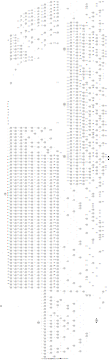

In [23]:
# View of the complete grammar structure
lexicon = FST.rlg(grammar, "S")
lexicon.view()

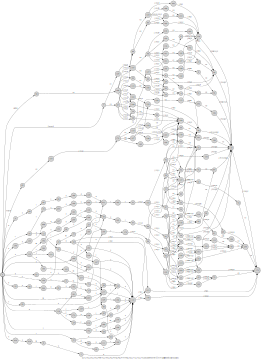

In [24]:
# View of the grammar structure minimized
lexicon = lexicon.epsilon_remove().determinize().minimize()
lexicon.view()

In [25]:
# View of the complete paradigm (middle step)
print(Paradigm(lexicon, ".*"))

amontoar   [V1][1p][Pl][Future][Ind]   amontoar+aremos   
amontoar   [V1][1p][Pl][Past][Ind]     amontoar+amos     
amontoar   [V1][1p][Pl][Present][Ind]  amontoar+amos     
amontoar   [V1][1p][Sg][Future][Ind]   amontoar+arei     
amontoar   [V1][1p][Sg][Past][Ind]     amontoar+ei       
amontoar   [V1][1p][Sg][Present][Ind]  amontoar+o        
amontoar   [V1][2p][Pl][Future][Ind]   amontoar+aredes   
amontoar   [V1][2p][Pl][Past][Ind]     amontoar+astes    
amontoar   [V1][2p][Pl][Present][Ind]  amontoar+ades     
amontoar   [V1][2p][Sg][Future][Ind]   amontoar+arás     
amontoar   [V1][2p][Sg][Past][Ind]     amontoar+aches    
amontoar   [V1][2p][Sg][Present][Ind]  amontoar+as       
amontoar   [V1][3p][Pl][Future][Ind]   amontoar+arán     
amontoar   [V1][3p][Pl][Past][Ind]     amontoar+aron     
amontoar   [V1][3p][Pl][Present][Ind]  amontoar+an       
amontoar   [V1][3p][Sg][Future][Ind]   amontoar+ará      
amontoar   [V1][3p][Sg][Past][Ind]     amontoar+ou       
amontoar   [V1

In [26]:
# View of the paradigm for the nouns (middle step)
print(Paradigm(lexicon, ".*'[N]'.*"))

animal     [N][Pl]  animal+s     
animal     [N][Sg]  animal       
avoa       [N][Pl]  avoa+s       
avoa       [N][Sg]  avoa         
bolboreta  [N][Pl]  bolboreta+s  
bolboreta  [N][Sg]  bolboreta    
can        [N][Pl]  can+s        
can        [N][Sg]  can          
candil     [N][Pl]  candil+s     
candil     [N][Sg]  candil       
compás     [N][Pl]  compás+s     
compás     [N][Sg]  compás       
fax        [N][Pl]  fax+s        
fax        [N][Sg]  fax          
foz        [N][Pl]  foz+s        
foz        [N][Sg]  foz          
iglú       [N][Pl]  iglú+s       
iglú       [N][Sg]  iglú         
irmá       [N][Pl]  irmá+s       
irmá       [N][Sg]  irmá         
lapis      [N][Pl]  lapis+s      
lapis      [N][Sg]  lapis        
lei        [N][Pl]  lei+s        
lei        [N][Sg]  lei          
luns       [N][Pl]  luns+s       
luns       [N][Sg]  luns         
mel        [N][Pl]  mel+s        
mel        [N][Sg]  mel          
noz        [N][Pl]  noz+s        
noz        [N]

In [27]:
# View of the paradigm for the verbs (middle step)
print(Paradigm(lexicon, ".*'[V1]'.*")) # first conjugation
print(Paradigm(lexicon, ".*'[V2]'.*")) # second conjugation
print(Paradigm(lexicon, ".*'[V3]'.*")) #third conjugation

amontoar  [V1][1p][Pl][Future][Ind]   amontoar+aremos  
amontoar  [V1][1p][Pl][Past][Ind]     amontoar+amos    
amontoar  [V1][1p][Pl][Present][Ind]  amontoar+amos    
amontoar  [V1][1p][Sg][Future][Ind]   amontoar+arei    
amontoar  [V1][1p][Sg][Past][Ind]     amontoar+ei      
amontoar  [V1][1p][Sg][Present][Ind]  amontoar+o       
amontoar  [V1][2p][Pl][Future][Ind]   amontoar+aredes  
amontoar  [V1][2p][Pl][Past][Ind]     amontoar+astes   
amontoar  [V1][2p][Pl][Present][Ind]  amontoar+ades    
amontoar  [V1][2p][Sg][Future][Ind]   amontoar+arás    
amontoar  [V1][2p][Sg][Past][Ind]     amontoar+aches   
amontoar  [V1][2p][Sg][Present][Ind]  amontoar+as      
amontoar  [V1][3p][Pl][Future][Ind]   amontoar+arán    
amontoar  [V1][3p][Pl][Past][Ind]     amontoar+aron    
amontoar  [V1][3p][Pl][Present][Ind]  amontoar+an      
amontoar  [V1][3p][Sg][Future][Ind]   amontoar+ará     
amontoar  [V1][3p][Sg][Past][Ind]     amontoar+ou      
amontoar  [V1][3p][Sg][Present][Ind]  amontoar+a

#  Alternation rules

Below, we write the rules to fix those errors made by the generalization of the grammar

## Pluralize nouns

The rules are the following:

- Nouns ended in vowel, diphthong or -n add -s
- Nouns ended in -r or -z add -es
- Oxytone nouns ended in -s add -es, if they are not oxytone, they do not change
- Nouns ended in -ns or -x does not change
- Oxytone nouns ended in -il replace it by -ís
- Monosyllables ended in -l add -es
- Oxytone nouns ended in -l replace it by -is
- Nouns ended in another consonants add -s

## Conjugate verbs

The rules are the following:

- Remove -ar, -er, -ir from the infinitive and add the corresponding suffixes.
- Verbs ended in -aer,-oer, -aír, -oír add -i- when the suffix starts by o- or a-


## Graphic alternations

When adding those suffixes, it must be taken into account the following:

- -Z- is replaced by -c- if the suffix starts by e-
- -C- is replaced by -z- when the suffix starts by o- or a-
- -Qu- is replaced by -c- when the the suffix starts by o- or a-

Note: to make them work properly, I reordered them below.

In [28]:
fsts = {} 
fsts["lexicon"] = lexicon.epsilon_remove().determinize().minimize()

fsts["V"] = FST.re("[aeiou]") # vowels
fsts["C"] = FST.re("[a-zñ]-[aeiou]") # consonants


# Rules for the nouns

# nouns ended in -s (when they are not oxytone, in which case the syllable would be stressed), -ns or -x does not change
fsts["ruleNoun1"] = FST.re("$^rewrite(s:'' / (as|es|is|os|us|ns|x) \+ _)")

# nouns ended in -il replace it by í
fsts["ruleNoun2"] = FST.re("$^rewrite((il):í / _ \+ s)")

# oxytone nouns ended in s add e, and remove the accent
fsts["ruleNoun3"] = FST.re("$^rewrite('':e / s \+ _ s) @ $^rewrite((á:a|é:e|í:i|ó:o|ú:u) /  _ $C+ \+ e s)", fsts)

# nouns ended in -r or -z add e before the suffix, in addition, z is replaced by c if the suffix starts by e
fsts["ruleNoun4"] = FST.re("$^rewrite('':e / (r|z) \+ _ s) @ $^rewrite(z:c/ _\+ e)")

# oxytone nouns with more than one syllable ended in -l replace it by i, if not, they add e before the suffix
fsts["ruleNoun5"] = FST.re("$^rewrite('':e/(sol|mel)_\+s) @ $^rewrite(l:i/ _\+ s) ")


# Rules for the verbs

# verbs ended in -aer,-oer, -aír, -oír add -i- when the suffix starts by o or a, and the suffix -iches has accent
fsts["ruleVerb1"] = FST.re("$^rewrite('':i / (aer|oer|aír|oír) \+ _ (o|a)) @ $^rewrite(i:í / (aer|oer|aír|oír) \+ _ ches)")

# I remove the suffixes -ar, -er, and -ir from the infinitive to conjugate the verb
fsts["ruleVerb2"]= FST.re("$^rewrite((ar|er|ir):''/_\+)")

# verbs ended in -cer and -cir change the c by a z when the suffix starts by o or a
fsts["ruleVerb3"] = FST.re("$^rewrite(c:z/ _\+ (o|a))")

# verbs with -qu- replace it by c when the the suffix starts by o or a
fsts["ruleVerb4"] = FST.re("$^rewrite((qu):c/ _\+ (o|a))")


# Final rule to remove +
fsts["cleanup"] = FST.re("$^rewrite('+':'')") 


# Compiling the grammar

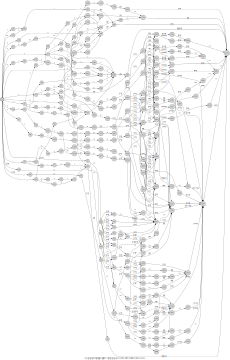

In [29]:
# I put everything together
galician = FST.re("$lexicon @ $ruleNoun1 @ $ruleNoun2 @ $ruleNoun3 @ $ruleNoun4 @ $ruleNoun5 \
                          @ $ruleVerb1 @ $ruleVerb2 @ $ruleVerb3 @ $ruleVerb4 @ $cleanup", fsts)
galician.view()

In [30]:
# Complete paradigm
print(Paradigm(galician, ".*"))

amontoar   [V1][1p][Pl][Future][Ind]   amontoaremos   
amontoar   [V1][1p][Pl][Past][Ind]     amontoamos     
amontoar   [V1][1p][Pl][Present][Ind]  amontoamos     
amontoar   [V1][1p][Sg][Future][Ind]   amontoarei     
amontoar   [V1][1p][Sg][Past][Ind]     amontoei       
amontoar   [V1][1p][Sg][Present][Ind]  amontoo        
amontoar   [V1][2p][Pl][Future][Ind]   amontoaredes   
amontoar   [V1][2p][Pl][Past][Ind]     amontoastes    
amontoar   [V1][2p][Pl][Present][Ind]  amontoades     
amontoar   [V1][2p][Sg][Future][Ind]   amontoarás     
amontoar   [V1][2p][Sg][Past][Ind]     amontoaches    
amontoar   [V1][2p][Sg][Present][Ind]  amontoas       
amontoar   [V1][3p][Pl][Future][Ind]   amontoarán     
amontoar   [V1][3p][Pl][Past][Ind]     amontoaron     
amontoar   [V1][3p][Pl][Present][Ind]  amontoan       
amontoar   [V1][3p][Sg][Future][Ind]   amontoará      
amontoar   [V1][3p][Sg][Past][Ind]     amontoou       
amontoar   [V1][3p][Sg][Present][Ind]  amontoa        
animal    

In [31]:
# Paradigm for the nouns
print(Paradigm(galician, ".*'[N]'.*"))

animal     [N][Pl]  animais     
animal     [N][Sg]  animal      
avoa       [N][Pl]  avoas       
avoa       [N][Sg]  avoa        
bolboreta  [N][Pl]  bolboretas  
bolboreta  [N][Sg]  bolboreta   
can        [N][Pl]  cans        
can        [N][Sg]  can         
candil     [N][Pl]  candís      
candil     [N][Sg]  candil      
compás     [N][Pl]  compases    
compás     [N][Sg]  compás      
fax        [N][Pl]  fax         
fax        [N][Sg]  fax         
foz        [N][Pl]  foces       
foz        [N][Sg]  foz         
iglú       [N][Pl]  iglús       
iglú       [N][Sg]  iglú        
irmá       [N][Pl]  irmás       
irmá       [N][Sg]  irmá        
lapis      [N][Pl]  lapis       
lapis      [N][Sg]  lapis       
lei        [N][Pl]  leis        
lei        [N][Sg]  lei         
luns       [N][Pl]  luns        
luns       [N][Sg]  luns        
mel        [N][Pl]  meles       
mel        [N][Sg]  mel         
noz        [N][Pl]  noces       
noz        [N][Sg]  noz         
papel     

In [32]:
# Paradigm for the verbs
print(Paradigm(galician, ".*'[V1]'.*"))
print(Paradigm(galician, ".*'[V2]'.*"))
print(Paradigm(galician, ".*'[V3]'.*"))

amontoar  [V1][1p][Pl][Future][Ind]   amontoaremos  
amontoar  [V1][1p][Pl][Past][Ind]     amontoamos    
amontoar  [V1][1p][Pl][Present][Ind]  amontoamos    
amontoar  [V1][1p][Sg][Future][Ind]   amontoarei    
amontoar  [V1][1p][Sg][Past][Ind]     amontoei      
amontoar  [V1][1p][Sg][Present][Ind]  amontoo       
amontoar  [V1][2p][Pl][Future][Ind]   amontoaredes  
amontoar  [V1][2p][Pl][Past][Ind]     amontoastes   
amontoar  [V1][2p][Pl][Present][Ind]  amontoades    
amontoar  [V1][2p][Sg][Future][Ind]   amontoarás    
amontoar  [V1][2p][Sg][Past][Ind]     amontoaches   
amontoar  [V1][2p][Sg][Present][Ind]  amontoas      
amontoar  [V1][3p][Pl][Future][Ind]   amontoarán    
amontoar  [V1][3p][Pl][Past][Ind]     amontoaron    
amontoar  [V1][3p][Pl][Present][Ind]  amontoan      
amontoar  [V1][3p][Sg][Future][Ind]   amontoará     
amontoar  [V1][3p][Sg][Past][Ind]     amontoou      
amontoar  [V1][3p][Sg][Present][Ind]  amontoa       
cambiar   [V1][1p][Pl][Future][Ind]   cambiare

# Complete Code

Below, we provide the whole code in a single chunk.

In [33]:
from pyfoma import *

# List with noun stems

nouns = ["bolboreta", "irmá", "peixe", "prato", "iglú", "avoa", "lei", "praia", "can", "xamón", "noz", "foz", "pintor",
         "compás", "lapis", "luns", "fax", "tórax", "mel", "sol", "papel", "animal", "candil"]
# meanings = [butterfly, sister, fish, plate, igloo, grandmother, law, beach, dog, ham, walnut, sickle, painter,
#            compass, pencil, Monday, fax, thorax, honey, sun, paper, animal, oil lamp]


########## List with verb stems

verbs1 = ["falar", "amontoar", "cambiar"] # verbs from the first conjugation -ar
verbs2 = ["comer", "obedecer", "atraer"] # verbs from the second conjugation -er
verbs3 = ["partir", "traducir", "delinquir"] # verbs from the third conjugation -ir
# meanings = [talk, stack, change],
#            [eat, obey, attract],
#            [leave, translate, commit crime]

irregular_verbs = ["estar", "facer", "dicir"] # irregular verbs
# meanings = [be, do/make, say]


########## Starting the grammar

grammar = {}
grammar["S"] = [("", "Noun"), ("", "Verb")]


########## Nouns

grammar["Noun"] = [(noun, "NInfl") for noun in nouns] # I tag the nouns
#
grammar["NInfl"] = [(("'[N]''[Sg]'", ""), "#"), (("'[N]''[Pl]'", "+s"), "#")] # we normally pluralize adding -s


########## Verbs

grammar["Verb"] = [(verb, "V1") for verb in verbs1] # I tag the verbs
grammar["Verb"] += [(verb, "V2") for verb in verbs2]
grammar["Verb"] += [(verb, "V3") for verb in verbs3]


# I add the irregular verbs, I chose ("estar", "facer", "dicir")

# present indicative tense of "estar"
grammar["Verb"]+= [(("'estar' '[V1]' '[1p]' '[Sg]' '[Present]' '[Ind]'", "estou"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Sg]' '[Present]' '[Ind]'", "estás"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Sg]' '[Present]' '[Ind]'", "está"), "#"), \
                   (("'estar' '[V1]' '[1p]' '[Pl]' '[Present]' '[Ind]'", "estamos"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Pl]' '[Present]' '[Ind]'", "estades"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Pl]' '[Present]' '[Ind]'", "están"), "#")]

# past simple indicative tense of "estar"
grammar["Verb"]+= [(("'estar' '[V1]' '[1p]' '[Sg]' '[Past]' '[Ind]'", "estiven"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Pl]' '[Past]' '[Ind]'", "estiveches"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Sg]' '[Past]' '[Ind]'", "estivo"), "#"), \
                   (("'estar' '[V1]' '[1p]' '[Pl]' '[Past]' '[Ind]'", "estivemos"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Sg]' '[Past]' '[Ind]'", "estivestes"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Pl]' '[Past]' '[Ind]'", "estiveron"), "#")]

# future indicative tense of "estar"
grammar["Verb"]+= [(("'estar' '[V1]' '[1p]' '[Sg]' '[Future]' '[Ind]'", "estarei"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Sg]' '[Future]' '[Ind]'", "estarás"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Sg]' '[Future]' '[Ind]'", "estará"), "#"), \
                   (("'estar' '[V1]' '[1p]' '[Pl]' '[Future]' '[Ind]'", "estaremos"), "#"), \
                   (("'estar' '[V1]' '[2p]' '[Pl]' '[Future]' '[Ind]'", "estaredes"), "#"), \
                   (("'estar' '[V1]' '[3p]' '[Pl]' '[Future]' '[Ind]'", "estarán"), "#")]

# present indicative tense of "facer"
grammar["Verb"]+= [(("'facer' '[V2]' '[1p]' '[Sg]' '[Present]' '[Ind]'", "fago"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Sg]' '[Present]' '[Ind]'", "fas"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Sg]' '[Present]' '[Ind]'", "fai"), "#"), \
                   (("'facer' '[V2]' '[1p]' '[Pl]' '[Present]' '[Ind]'", "facemos"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Pl]' '[Present]' '[Ind]'", "facedes"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Pl]' '[Present]' '[Ind]'", "fan"), "#")]

# past simple indicative tense of "facer"
grammar["Verb"]+= [(("'facer' '[V2]' '[1p]' '[Sg]' '[Past]' '[Ind]'", "fixen"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Sg]' '[Past]' '[Ind]'", "fixeches"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Sg]' '[Past]' '[Ind]'", "fixo"), "#"), \
                   (("'facer' '[V2]' '[1p]' '[Pl]' '[Past]' '[Ind]'", "fixemos"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Pl]' '[Past]' '[Ind]'", "fixestes"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Pl]' '[Past]' '[Ind]'", "fixeron"), "#")]

# future indicative tense of "facer"
grammar["Verb"]+= [(("'facer' '[V2]' '[1p]' '[Sg]' '[Future]' '[Ind]'", "farei"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Sg]' '[Future]' '[Ind]'", "farás"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Sg]' '[Future]' '[Ind]'", "fará"), "#"), \
                   (("'facer' '[V2]' '[1p]' '[Pl]' '[Future]' '[Ind]'", "faremos"), "#"), \
                   (("'facer' '[V2]' '[2p]' '[Pl]' '[Future]' '[Ind]'", "faredes"), "#"), \
                   (("'facer' '[V2]' '[3p]' '[Pl]' '[Future]' '[Ind]'", "farán"), "#")]

# present indicative tense of "dicir"
grammar["Verb"]+= [(("'dicir' '[V3]' '[1p]' '[Sg]' '[Present]' '[Ind]'", "digo"), "#"), \
                   (("'dicir' '[V3]' '[2p]' '[Sg]' '[Present]' '[Ind]'", "dis"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Sg]' '[Present]' '[Ind]'", "di"), "#"), \
                   (("'dicir' '[V3]' '[1p]' '[Pl]' '[Present]' '[Ind]'", "dicimos"), "#"), \
                   (("'dicir' '[V3]' '[2p]' '[Pl]' '[Present]' '[Ind]'", "dicides"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Pl]' '[Present]' '[Ind]'", "din"), "#")]

# past simple indicative tense of "dicir"
grammar["Verb"]+= [(("'dicir' '[V3]' '[1p]' '[Sg]' '[Past]' '[Ind]'", "dixen"), "#"),\
                   (("'dicir' '[V3]' '[2p]' '[Sg]' '[Past]' '[Ind]'", "dixeches"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Sg]' '[Past]' '[Ind]'", "dixo"), "#"), \
                   (("'dicir' '[V3]' '[1p]' '[Pl]' '[Past]' '[Ind]'", "dixemos"), "#"), \
                   (("'dicir' '[V3]' '[2p]' '[Pl]' '[Past]' '[Ind]'", "dixestes"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Pl]' '[Past]' '[Ind]'", "dixeron"), "#")]

# future indicative tense of "dicir"
grammar["Verb"]+= [(("'dicir' '[V3]' '[1p]' '[Sg]' '[Future]' '[Ind]'", "direi"), "#"), \
                   (("'dicir' '[V3]' '[2p]' '[Sg]' '[Future]' '[Ind]'", "dirás"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Sg]' '[Future]' '[Ind]'", "dirá"), "#"), \
                   (("'dicir' '[V3]' '[1p]' '[Pl]' '[Future]' '[Ind]'", "diremos"), "#"), \
                   (("'dicir' '[V3]' '[2p]' '[Pl]' '[Future]' '[Ind]'", "diredes"), "#"), \
                   (("'dicir' '[V3]' '[3p]' '[Pl]' '[Future]' '[Ind]'", "dirán"), "#")]



# I add the other non-terminal of our grammar to distinguish the conjugations

grammar["V1"] = [(("'[V1]'", ""), "VInfl1")]
grammar["V2"]= [(("'[V2]'", ""), "VInfl2")]
grammar["V3"]= [(("'[V3]'", ""), "VInfl3")]


# first conjugation

# present indicative tense
grammar["VInfl1"] = [(("'[1p]' '[Sg]' '[Present]' '[Ind]'", "+o"), "#"), \
                     (("'[2p]' '[Sg]' '[Present]' '[Ind]'", "+as"), "#"), \
                     (("'[3p]' '[Sg]' '[Present]' '[Ind]'", "+a"), "#"), \
                     (("'[1p]' '[Pl]' '[Present]' '[Ind]'", "+amos"), "#"), \
                     (("'[2p]' '[Pl]' '[Present]' '[Ind]'", "+ades"), "#"), \
                     (("'[3p]' '[Pl]' '[Present]' '[Ind]'", "+an"), "#"),]

# past simple indicative tense
grammar["VInfl1"] += [(("'[1p]''[Sg]''[Past]''[Ind]'", "+ei"), "#"), \
                      (("'[2p]''[Sg]''[Past]''[Ind]'", "+aches"), "#"), \
                      (("'[3p]''[Sg]''[Past]''[Ind]'", "+ou"), "#"), \
                      (("'[1p]''[Pl]''[Past]''[Ind]'", "+amos"), "#"), \
                      (("'[2p]''[Pl]''[Past]''[Ind]'", "+astes"), "#"), \
                      (("'[3p]''[Pl]''[Past]''[Ind]'", "+aron"), "#"),]

# future indicative tense
grammar["VInfl1"] += [(("'[1p]''[Sg]''[Future]''[Ind]'", "+arei"), "#"), \
                      (("'[2p]''[Sg]''[Future]''[Ind]'", "+arás"), "#"), \
                      (("'[3p]''[Sg]''[Future]''[Ind]'", "+ará"), "#"), \
                      (("'[1p]''[Pl]''[Future]''[Ind]'", "+aremos"), "#"), \
                      (("'[2p]''[Pl]''[Future]''[Ind]'", "+aredes"), "#"), \
                      (("'[3p]''[Pl]''[Future]''[Ind]'", "+arán"), "#"),]


# second conjugation

# present indicative tense
grammar["VInfl2"] = [(("'[1p]' '[Sg]' '[Present]' '[Ind]'", "+o"), "#"), \
                     (("'[2p]' '[Sg]' '[Present]' '[Ind]'", "+es"), "#"), \
                     (("'[3p]' '[Sg]' '[Present]' '[Ind]'", "+e"), "#"), \
                     (("'[1p]' '[Pl]' '[Present]' '[Ind]'", "+emos"), "#"), \
                     (("'[2p]' '[Pl]' '[Present]' '[Ind]'", "+edes"), "#"), \
                     (("'[3p]' '[Pl]' '[Present]' '[Ind]'", "+en"), "#"),]

# past simple indicative tense
grammar["VInfl2"] += [(("'[1p]''[Sg]''[Past]''[Ind]'", "+ín"), "#"), \
                      (("'[2p]''[Sg]''[Past]''[Ind]'", "+iches"), "#"), \
                      (("'[3p]''[Sg]''[Past]''[Ind]'", "+en"), "#"), \
                      (("'[1p]''[Pl]''[Past]''[Ind]'", "+emos"), "#"), \
                      (("'[2p]''[Pl]''[Past]''[Ind]'", "+estes"), "#"), \
                      (("'[3p]''[Pl]''[Past]''[Ind]'", "+eron"), "#"),]

# future indicative tense
grammar["VInfl2"] += [(("'[1p]''[Sg]''[Future]''[Ind]'", "+erei"), "#"), \
                      (("'[2p]''[Sg]''[Future]''[Ind]'", "+erás"), "#"), \
                      (("'[3p]''[Sg]''[Future]''[Ind]'", "+erá"), "#"), \
                      (("'[1p]''[Pl]''[Future]''[Ind]'", "+eremos"), "#"), \
                      (("'[2p]''[Pl]''[Future]''[Ind]'", "+eredes"), "#"), \
                      (("'[3p]''[Pl]''[Future]''[Ind]'", "+erán"), "#"),]


# third conjugation

# present indicative tense
grammar["VInfl3"] = [(("'[1p]' '[Sg]' '[Present]' '[Ind]'", "+o"), "#"), \
                     (("'[2p]' '[Sg]' '[Present]' '[Ind]'", "+es"), "#"), \
                     (("'[3p]' '[Sg]' '[Present]' '[Ind]'", "+e"), "#"), \
                     (("'[1p]' '[Pl]' '[Present]' '[Ind]'", "+imos"), "#"), \
                     (("'[2p]' '[Pl]' '[Present]' '[Ind]'", "+ides"), "#"), \
                     (("'[3p]' '[Pl]' '[Present]' '[Ind]'", "+en"), "#"),]

# past simple indicative tense
grammar["VInfl3"] += [(("'[1p]''[Sg]''[Past]''[Ind]'", "+ín"), "#"), \
                      (("'[2p]''[Sg]''[Past]''[Ind]'", "+iches"), "#"), \
                      (("'[3p]''[Sg]''[Past]''[Ind]'", "+iu"), "#"), \
                      (("'[1p]''[Pl]''[Past]''[Ind]'", "+imos"), "#"), \
                      (("'[2p]''[Pl]''[Past]''[Ind]'", "+istes"), "#"), \
                      (("'[3p]''[Pl]''[Past]''[Ind]'", "+iron"), "#"),]

# future indicative tense
grammar["VInfl3"] += [(("'[1p]''[Sg]''[Future]''[Ind]'", "+irei"), "#"), \
                      (("'[2p]''[Sg]''[Future]''[Ind]'", "+irás"), "#"), \
                      (("'[3p]''[Sg]''[Future]''[Ind]'", "+irá"), "#"), \
                      (("'[1p]''[Pl]''[Future]''[Ind]'", "+iremos"), "#"), \
                      (("'[2p]''[Pl]''[Future]''[Ind]'", "+iredes"), "#"), \
                      (("'[3p]''[Pl]''[Future]''[Ind]'", "+irán"), "#"),]

lexicon = FST.rlg(grammar, "S")

fsts = {} 
fsts["lexicon"] = lexicon.epsilon_remove().determinize().minimize()

fsts["V"] = FST.re("[aeiou]") # vowels
fsts["C"] = FST.re("[a-zñ]-[aeiou]") # consonants


# Rules for the nouns

# nouns ended in -s (when they are not oxytone, in which case the syllable would be stressed), -ns or -x does not change
fsts["ruleNoun1"] = FST.re("$^rewrite(s:'' / (as|es|is|os|us|ns|x) \+ _)")

# nouns ended in -il replace it by í
fsts["ruleNoun2"] = FST.re("$^rewrite((il):í / _ \+ s)")

# oxytone nouns ended in s add e, and remove the accent
fsts["ruleNoun3"] = FST.re("$^rewrite('':e / s \+ _ s) @ $^rewrite((á:a|é:e|í:i|ó:o|ú:u) /  _ $C+ \+ e s)", fsts)

# nouns ended in -r or -z add e before the suffix, in addition, z is replaced by c if the suffix starts by e
fsts["ruleNoun4"] = FST.re("$^rewrite('':e / (r|z) \+ _ s) @ $^rewrite(z:c/ _\+ e)")

# oxytone nouns with more than one syllable ended in -l replace it by i, if not, they add e before the suffix
fsts["ruleNoun5"] = FST.re("$^rewrite('':e/(sol|mel)_\+s) @ $^rewrite(l:i/ _\+ s) ")


# Rules for the verbs

# verbs ended in -aer,-oer, -aír, -oír add -i- when the suffix starts by o or a, and the suffix -iches has accent
fsts["ruleVerb1"] = FST.re("$^rewrite('':i / (aer|oer|aír|oír) \+ _ (o|a)) @ $^rewrite(i:í / (aer|oer|aír|oír) \+ _ ches)")

# I remove the suffixes -ar, -er, and -ir from the infinitive to conjugate the verb
fsts["ruleVerb2"]= FST.re("$^rewrite((ar|er|ir):''/_\+)")

# verbs ended in -cer and -cir change the c by a z when the suffix starts by o or a
fsts["ruleVerb3"] = FST.re("$^rewrite(c:z/ _\+ (o|a))")

# verbs with -qu- replace it by c when the the suffix starts by o or a
fsts["ruleVerb4"] = FST.re("$^rewrite((qu):c/ _\+ (o|a))")


# Final rule to remove +
fsts["cleanup"] = FST.re("$^rewrite('+':'')") 


# I put everything together
galician = FST.re("$lexicon @ $ruleNoun1 @ $ruleNoun2 @ $ruleNoun3 @ $ruleNoun4 @ $ruleNoun5\
                          @ $ruleVerb1 @ $ruleVerb2 @ $ruleVerb3 @ $ruleVerb4 @ $cleanup", fsts)

print(Paradigm(galician, ".*"))

amontoar   [V1][1p][Pl][Future][Ind]   amontoaremos   
amontoar   [V1][1p][Pl][Past][Ind]     amontoamos     
amontoar   [V1][1p][Pl][Present][Ind]  amontoamos     
amontoar   [V1][1p][Sg][Future][Ind]   amontoarei     
amontoar   [V1][1p][Sg][Past][Ind]     amontoei       
amontoar   [V1][1p][Sg][Present][Ind]  amontoo        
amontoar   [V1][2p][Pl][Future][Ind]   amontoaredes   
amontoar   [V1][2p][Pl][Past][Ind]     amontoastes    
amontoar   [V1][2p][Pl][Present][Ind]  amontoades     
amontoar   [V1][2p][Sg][Future][Ind]   amontoarás     
amontoar   [V1][2p][Sg][Past][Ind]     amontoaches    
amontoar   [V1][2p][Sg][Present][Ind]  amontoas       
amontoar   [V1][3p][Pl][Future][Ind]   amontoarán     
amontoar   [V1][3p][Pl][Past][Ind]     amontoaron     
amontoar   [V1][3p][Pl][Present][Ind]  amontoan       
amontoar   [V1][3p][Sg][Future][Ind]   amontoará      
amontoar   [V1][3p][Sg][Past][Ind]     amontoou       
amontoar   [V1][3p][Sg][Present][Ind]  amontoa        
animal    